# World Cheese Awards 2021
Laden sie sich den Käse-Datensatz lokal herunter und beginnen sie mit der Analyse, wie wir es im Kurs gelernt haben. Führen sie die Zwischenschritte (einlesen, Übersicht verschaffen, Statistik, Cleaning, ...) wie im Kurs geübt aus oder prüfen sie, ob diese notwendig sind. Wo ist der Datensatz löchrig? Werden uns Käse-Imitate (Duplikate) untergeschoben?

Halten sie alle Entscheidungen im Jupyter-Notebook oder als Kommentar im Sourcecode fest.

Es soll untersucht werden:

* Welches sind die besten Käse weltweit?
* Was ist das Käseland Nummer 1? (Land mit den meisten Einträgen)
* Welches sind die besten Käse in jeder Kategorie?
* Welches sind die besten Käse nach Region?
* Welcher Produzent hat die insgesamt höchste Bewertung?
* Welche Länder haben den besten Käse?

Wahrscheinlich fallen ihnen "unterwegs" auch noch weitere Analyseziele ein. Gerne ergänzen!
Setzen sie an geeigneten Stellen auch Visualisierungen ein.

# Einlesen der Daten
Die Country Spalte ist ein guter Kandidat für eine Kategorie. Die erste Spalte im CSV ist nicht benannt (scheint eine Art ID zu sein). Wir interessieren uns jedoch nicht für diese Spalte. Aus diesem Grund wurden die relevanten Spaltene explizit angegeben.

In [3]:
import pandas as pd

dtypes = {
    "country": "category",
}
columns = ["company" ,"product_name" ,"rating", "category" ,"country", "county"]
cheese_df = pd.read_csv("./data/world_cheese_awards_2021.csv", dtype=dtypes, usecols=columns)
cheese_df.head()

,company,product_name,rating,category,country,county
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France,NaN
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece,NaN
2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy,NaN
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands,NaN


# Ermittlung der fehlenden Werte
Bei der Emittlung der fehlenden Werte fällt auf, dass die County Spalte eine sehr grosse Anzahl von fehlenden Werten hat. Bei so vielen Werten macht es wahrscheinlich Sinn die Spalte zu droppen.

In [4]:
num_missing = cheese_df.isna().sum()
num_missing

company            0
product_name       0
rating             0
category           0
country            0
county          1656
dtype: int64

<AxesSubplot: >

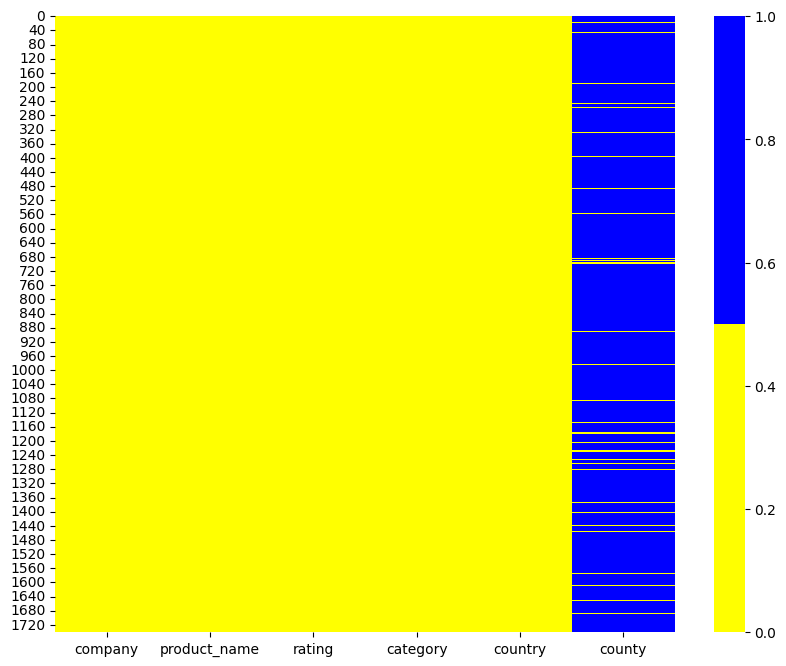

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
cols = cheese_df.columns

colors = ["yellow", "blue"]
sns.heatmap(cheese_df[cols].isna(), cmap=sns.color_palette(colors))

In [6]:
relevant_columns = ["company" ,"product_name" ,"rating", "category" ,"country"]
cheese_df = cheese_df[relevant_columns]
cheese_df.head()

,company,product_name,rating,category,country
0,Laiteries H. Triballat Website,Picandou L'Original,GOLD,5001 - Soft goats’ milk cheese plain – fresh,France
1,Fromageries Lescure (Savencia) Website,ISLOS GREEK GOAT CHEESE 150G,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Greece
2,Casale Roccolo azienda agricola biologica Web...,Caprino Fresco CASALE ROCCOLO,SILVER,5001 - Soft goats’ milk cheese plain – fresh,Italy
3,DeJong Cheese Website,Alphenaer Crumbled Goats Cheese Natural View ...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands
4,DeJong Cheese Website,Alphenaer Spreadable Goats Cheese Natural Vie...,BRONZE,5001 - Soft goats’ milk cheese plain – fresh,Netherlands


# Weitere Analyse der Daten

In [11]:
relevant_columns = ["company" ,"product_name" ,"rating", "category" ,"country"]
for column in relevant_columns:
    print(cheese_df[column].describe())
    print()

count                                  1741
unique                                  619
top       Savencia Fromage & Dairy  Website
freq                                     26
Name: company, dtype: object

count                               1741
unique                              1544
top       Parmigiano Reggiano 30-39 mesi
freq                                  44
Name: product_name, dtype: object

count       1741
unique         4
top       BRONZE
freq         747
Name: rating, dtype: object

count                                                  1741
unique                                                  115
top       5247 - Any other semi – hard Cows' milk cheese...
freq                                                     99
Name: category, dtype: object

count      1741
unique       39
top       Spain
freq        723
Name: country, dtype: object



Eine genauere Analyse des Produktnamens zeigt auf dass es alleine für den Produkt Namen ein paar duplizierte Einträge gibt.

In [23]:
product_names_without_duplicates = cheese_df.product_name.drop_duplicates()
print(cheese_df.product_name.shape)
print(product_names_without_duplicates.shape)

(1741,)
(1544,)


In [31]:
cheese_df.drop_duplicates(subset=["product_name"], inplace=True)
cheese_df.shape

(1545, 5)

# Welches sind die besten Käse weltweit?
Das Rating scheint im Format Super Gold, Gold, Bronze und Silver vergeben zu werden.

In [34]:
cheese_df.groupby("rating").count()

,company,product_name,category,country
rating,,,,
BRONZE,687,687,687,687
GOLD,266,266,266,266
SILVER,511,510,511,511
SUPER GOLD,81,81,81,81


Um die besten Käse weltweit zu erhalten kann wahrscheinlich einfach nach dem höchsten Rating gesucht werden. In diesem Fall SUPER GOLD.

In [43]:
cheese_df[cheese_df["rating"] == "SUPER GOLD"]

,company,product_name,rating,category,country
43,Hermanos Cuecas Morujo c. b. Website,Torta de Rufino,SUPER GOLD,5002 - Soft goats’ milk cheese plain – mouldri...,Spain
44,Quesos de Radiquero Website,Río Vero,SUPER GOLD,5002 - Soft goats’ milk cheese plain – mouldri...,Spain
47,Harvey & Brockless Ltd Website,Trufflyn Goats Cheese,SUPER GOLD,5002 - Soft goats’ milk cheese plain – mouldri...,United Kingdom
55,Fromages CDA Website,La Mascotte View Stockists,SUPER GOLD,5003 - Semi-hard goats’ milk cheese plain,Canada
62,Prolactine France Website,Tomme de chèvre Cave Rousseau,SUPER GOLD,5003 - Semi-hard goats’ milk cheese plain,France
...,...,...,...,...,...
1632,Menikio Website,Organic Feta PDO,SUPER GOLD,5515 - Feta plain without oil or additives,Greece
1634,MALKO GmbH Website,Felsen-Taler,SUPER GOLD,5518 - Any cheese that cannot be placed in any...,Austria
1643,Caseificio Sepertino Snc Website,Formaggio Testun Sepertino al Barolo DOCG,SUPER GOLD,5518 - Any cheese that cannot be placed in any...,Italy
1665,"Quesería Lafuente, S. A. U. Website",Crema de Queso Camembert / Camembert Cream Cheese,SUPER GOLD,5603 - Processed cheese or processed cheese sp...,Spain


# Was ist das Käseland Nummer 1? (Land mit den meisten Einträgen)

Gruppiert man dies noch nach Country und zählt diese aus, so fällt auf, dass Spanien eine hohe Anzahl von qualitativ hochwertigen Käse zu haben scheint.

<AxesSubplot: xlabel='country'>

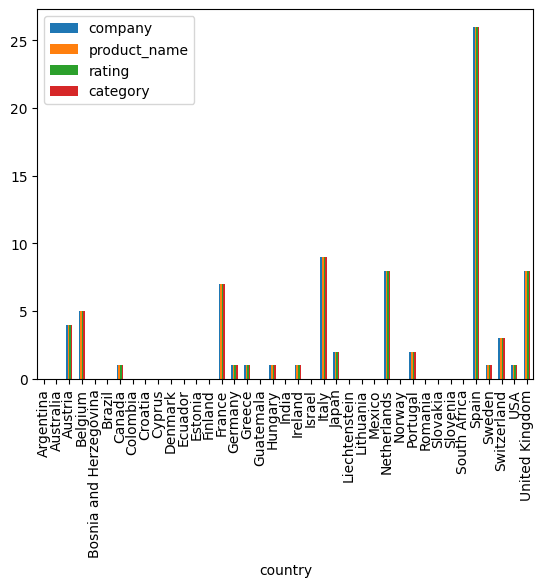

In [72]:
cheese_df[cheese_df["rating"] == "SUPER GOLD"].groupby("country").count().plot.bar()

# Welches sind die besten Käse in jeder Kategorie?

In [55]:
cheese_df[cheese_df["rating"] == "SUPER GOLD"].groupby(["category", "product_name"]).count()

company  \
category                                           product_name                                                 
5002 - Soft goats’ milk cheese plain – mouldrip... Río Vero                                                 1   
                                                   Torta de Rufino                                          1   
                                                   Trufflyn Goats Cheese                                    1   
5003 - Semi-hard goats’ milk cheese plain          Goat cheese extra matured                                1   
                                                   La Mascotte  View  Stockists                             1   
...                                                                                                       ...   
5515 - Feta plain without oil or additives         Organic Feta PDO                                         1   
5518 - Any cheese that cannot be placed in any ... Felsen-Taler                                             1   
                                                   Formaggio Testun Sepertino al Barolo DOCG                1   
5603 - Processed cheese or processed cheese spr... Crema de Queso Camembert / Camembert Cream Cheese        1   
5707 - Buffalo's milk cheese blue                  Buffalo Blue                                             1   

                                                                                                      rating  \
category                                           product_name                                                
5002 - Soft goats’ milk cheese plain – mouldrip... Río Vero                                                1   
                                                   Torta de Rufino                                         1   
                                                   Trufflyn Goats Cheese                                   1   
5003 - Semi-hard goats’ milk cheese plain          Goat cheese extra matured                               1   
                                                   La Mascotte  View  Stockists                            1   
...                                                                                                      ...   
5515 - Feta plain without oil or additives         Organic Feta PDO                                        1   
5518 - Any cheese that cannot be placed in any ... Felsen-Taler                                            1   
                                                   Formaggio Testun Sepertino al Barolo DOCG               1   
5603 - Processed cheese or processed cheese spr... Crema de Queso Camembert / Camembert Cream Cheese       1   
5707 - Buffalo's milk cheese blue                  Buffalo Blue                                            1   

                                                                                                      country  
category                                           product_name                                                
5002 - Soft goats’ milk cheese plain – mouldrip... Río Vero                                                 1  
                                                   Torta de Rufino                                          1  
                                                   Trufflyn Goats Cheese                                    1  
5003 - Semi-hard goats’ milk cheese plain          Goat cheese extra matured                                1  
                                                   La Mascotte  View  Stockists                             1  
...                                                                                                       ...  
5515 - Feta plain without oil or additives         Organic Feta PDO                                         1  
5518 - Any cheese that cannot be placed in any ... Felsen-Taler                                             1  
                                                   Form

# Welches sind die besten Käse nach Region?
Vielleicht war es nicht so eine gute Idee die Spalte "county" zu löschen...

# Welcher Produzent hat die insgesamt höchste Bewertung?

In [67]:
cheese_df[cheese_df["rating"] == "SUPER GOLD"].groupby("company").sum()

C:\Users\yhutter\AppData\Local\Temp\ipykernel_18148\2888188419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cheese_df[cheese_df["rating"] == "SUPER GOLD"].groupby("company").sum()


,product_name,rating,category
company,,,
AIRAS MONIZ SL Website,SAVEL,SUPER GOLD,"5407 - Blue vein cheese any variety, uncut, na..."
Agroalimentaria Valle de los Molinos S.L. Website,Queso Viejo Artesano / Old craftsman,SUPER GOLD,5103 - Hard ewes’ milk cheese plain
Agrupación de Ganaderos de los Montes de Málaga Website,Queso Curado Emborrizado Montes de Málaga,SUPER GOLD,5005 - Goats’ milk cheese with additives
Almnäs Bruk AB Website,Almnäs Tegel,SUPER GOLD,5248 - Any other hard Cows' milk cheese not in...
Arrigoni Battista Spa Website,Gorgonzola PDO Piccante,SUPER GOLD,5406 - Gorgonzola – Piccante
...,...,...,...
Trethowan's Dairy Ltd Website,Pitchfork Vintage Cheddar View StockistsGorw...,SUPER GOLDSUPER GOLD,5221 - Any farmhouse Cheddar made on or before...
Urstrom Kaese GmbH Website,Mulberry Weichkaese View Stockists,SUPER GOLD,5318 - Any other soft Cows’ milk cheese not in...
Van der Heiden Kaas BV Website,Eminence Grise - Tomme Chèvre Grise au Bleu,SUPER GOLD,5005 - Goats’ milk cheese with additives


# Bester Käse der Schweiz

In [71]:
cheese_grouped_by_country = cheese_df[cheese_df["rating"] == "SUPER GOLD"].groupby("country")
cheese_grouped_by_country.get_group("Switzerland")

,company,product_name,rating,category,country
983,Molkerei Davos Betriebs AG Website,Bear valley View Stockists,SUPER GOLD,5247 - Any other semi – hard Cows' milk cheese...,Switzerland
1067,Güntensperger Käse AG Website,Roter Teufel extra View Stockists,SUPER GOLD,5248 - Any other hard Cows' milk cheese not in...,Switzerland
1591,Walo von Mühlenen Ltd Website,L'Antoine de Fribourg View Stockists,SUPER GOLD,5509 - New Cheese – hard or semi-hard. Open to...,Switzerland
